In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [4]:
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax") # 10
    ])
    return model

In [5]:
optimizers = {
    'SGD': 'sgd',
    'Adagrad': 'adagrad',
    'RMSprop': 'rmsprop',
    'Adam': 'adam'
}

history_dict = {}

for name, optimizer in optimizers.items():
    print(f"--- Training with {name} ---")

    model = create_model()

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Train
    history = model.fit(
        x_train,
        y_train,
        batch_size=64,
        epochs=10,
        validation_data=(x_test, y_test),
        verbose=1
    )

    # Store the results
    history_dict[name] = history

--- Training with SGD ---
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6097 - loss: 1.3777 - val_accuracy: 0.8965 - val_loss: 0.3952
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8943 - loss: 0.3843 - val_accuracy: 0.9176 - val_loss: 0.3032
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9121 - loss: 0.3112 - val_accuracy: 0.9243 - val_loss: 0.2709
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9209 - loss: 0.2773 - val_accuracy: 0.9282 - val_loss: 0.2466
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9297 - loss: 0.2487 - val_accuracy: 0.9361 - val_loss: 0.2274
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9349 - loss: 0.2297 - val_accuracy: 0.9387 - val_loss: 0.2124
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9399 - loss: 0.2110 - val_accuracy: 0.9430 - val_loss: 0.1973
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9443 - loss:

In [6]:
metrics_data = []
for name, history in history_dict.items():
    #  best validation accuracy
    best_val_acc = max(history.history['val_accuracy'])

    metrics_data.append({
        "Optimizer": name,
        "Final Val Accuracy": f"{history.history['val_accuracy'][-1]:.4f}",
        "Best Val Accuracy": f"{best_val_acc:.4f} ",
        "Final Val Loss": f"{history.history['val_loss'][-1]:.4f}"
    })

# pandas DataFrame for a clean table
df_metrics = pd.DataFrame(metrics_data)
print("Performance Metrics Summary:")
print(df_metrics.to_string(index=False))

Performance Metrics Summary:
Optimizer Final Val Accuracy Best Val Accuracy Final Val Loss
      SGD             0.9509           0.9509          0.1652
  Adagrad             0.9123           0.9123          0.3164
  RMSprop             0.9748           0.9776          0.1014
     Adam             0.9802           0.9802          0.0784


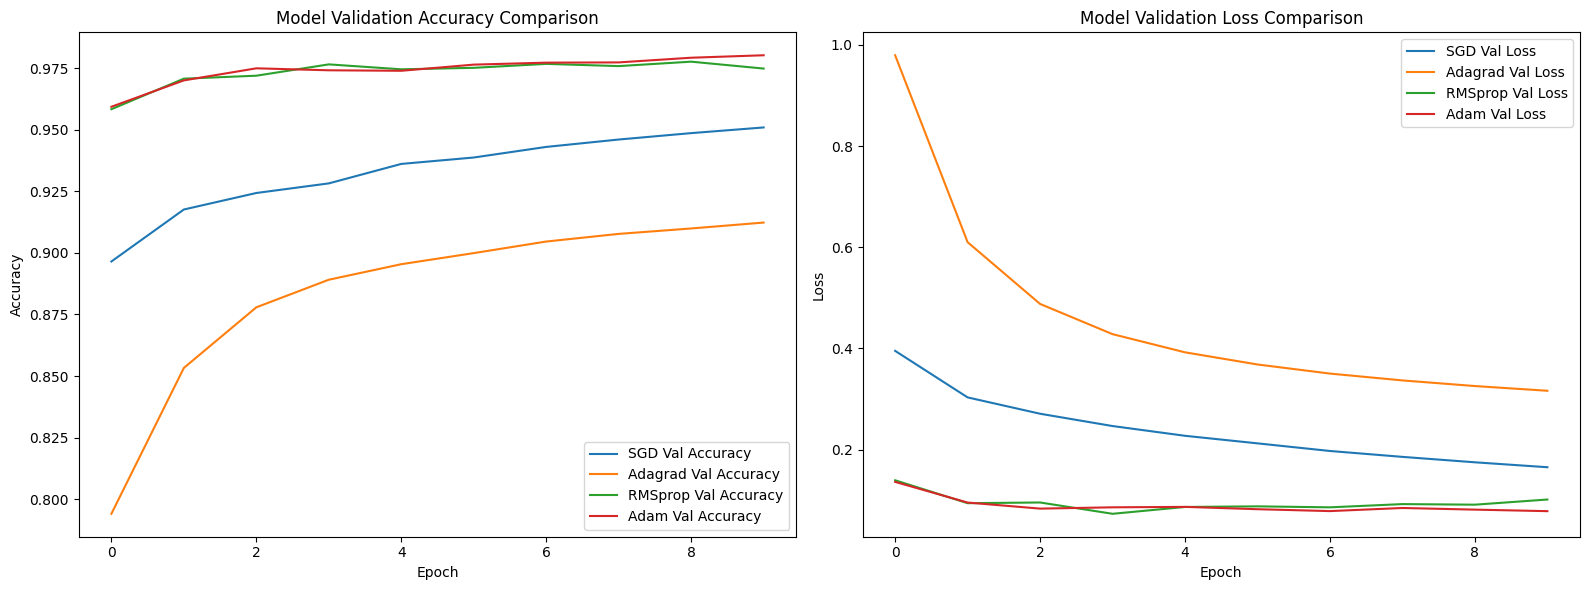

In [7]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#  training , validation accuracy values
for name, history in history_dict.items():
    ax1.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
ax1.set_title('Model Validation Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

# Plot training & validation loss values
for name, history in history_dict.items():
    ax2.plot(history.history['val_loss'], label=f'{name} Val Loss')
ax2.set_title('Model Validation Loss Comparison')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()